# Librerías a implementar

In [1]:
# Manejo de datos
import numpy as np
import pandas as pd

# Configuración para ver todas las columnas del conjunto de datos
pd.set_option('display.max_columns', None)

# Configuración para ver todas las filas del conjunto de metadatos
pd.set_option('display.max_rows', None)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

# Desactivas advertencias 
import warnings
warnings.filterwarnings('ignore')


# Introducción y Cargue de datos

In [2]:
#data = pd.read_csv('/home/jorfan/Universidad/Semestre_6/ML2/PROYECTO_FINAL/train.csv')
data = pd.read_csv('Data/train.csv')
data.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Información general del conjunto de datos
print(data.shape)
data.describe()

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Análisis Exploratorio de Datos

## Análisis Univariado

### Análisis Categórico

#### Conversión de variables a tipo "category"
Se realiza la conversión de las variables que tengan menos de 12 valores únicos y tipo "object" a tipo "category", con el objetivo de no tener variables numéricas que en realidad son categóricas. Esto adicionalmente nos permitirá tener desde un inicio los tipos de variables segmentados.

In [4]:
# Se convierten algunas variables a tipo "category"
for var in data.columns:
    if var in ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]:
        data[var] = data[var].astype('float64')
    elif len(data[var].unique()) <= 12:
        data[var] = data[var].astype('category')
    elif data[var].dtypes == 'object':
        data[var] = data[var].astype('category')
    else:
        data[var] = data[var].astype('float64')

# Se crea una variable que contiene la lista de variables numéricas
numeric_cols = data.select_dtypes(include=['float64']).columns.tolist()

# Cantidad de variables numéricas iniciales
len(numeric_cols)

# Se crea una variable que contiene la lista de variables categóricas
columnas_categoricas = data.select_dtypes(include=['category']).columns.tolist()

# Cantidad de variables categóricas iniciales
len(columnas_categoricas)

57

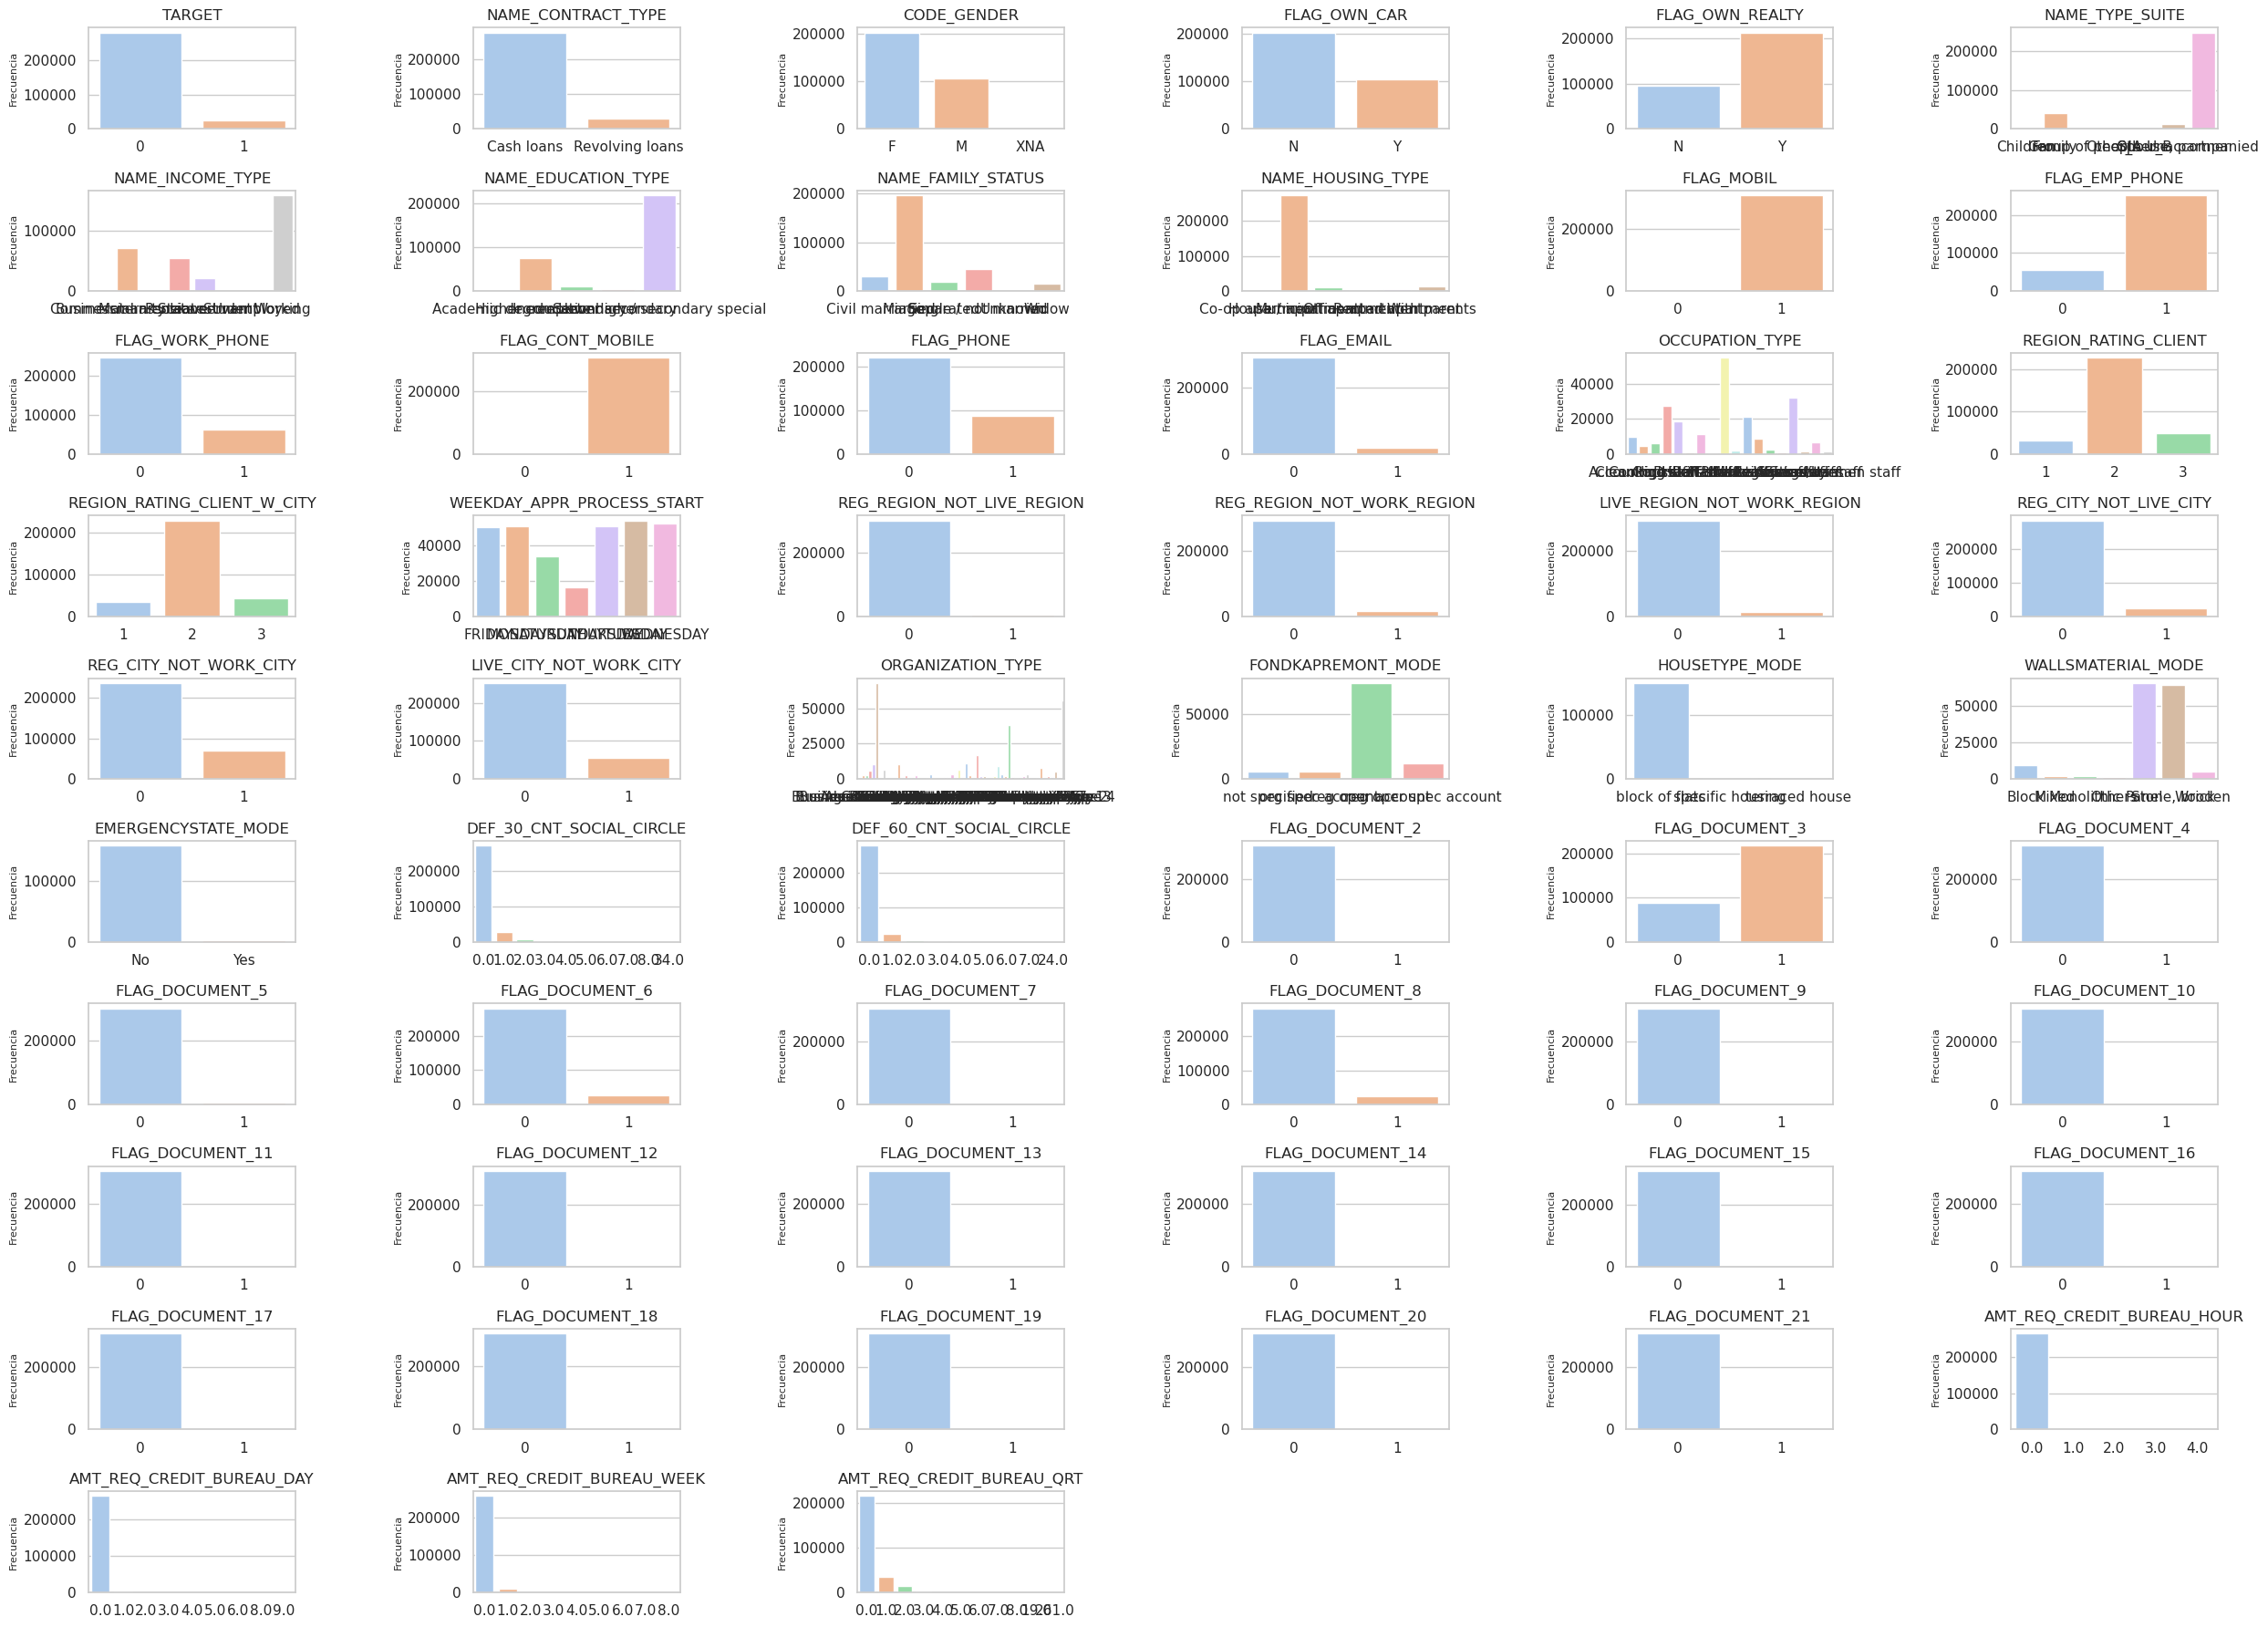

In [5]:
# Un panorama general de las variables categóricas 
# Estilo general
sns.set_theme(style="whitegrid")  

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18)) 
axes = axes.flatten() 

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):  
        sns.countplot(
            data=data, 
            x=columna, 
            ax=axes[i], 
            palette="pastel" 
        )
        axes[i].set_title(columna) 
        axes[i].set_xlabel("") 
        axes[i].set_ylabel("Frecuencia", fontsize=8) 
    else:
        axes[i].axis('off')  

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

#### Tratamiento de valores faltantes

In [6]:
# Se calcula la proporción de valores faltantes por variable
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtra por variables que tienen más de 30% de valores faltantes
var_con_faltantes = porcentaje[porcentaje > 30].index.tolist()

# Proporci+on de faltantes
var_faltantes = porcentaje[porcentaje > 30]

# Columnas con más del 30% de valores faltantes
print("Columnas con más del 30% de valores faltantes:")
print(var_con_faltantes, len(var_con_faltantes))
print(var_faltantes)

Columnas con más del 30% de valores faltantes:
['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 5
OCCUPATION_TYPE        31.345545
FONDKAPREMONT_MODE     68.386172
HOUSETYPE_MODE         50.176091
WALLSMATERIAL_MODE     50.840783
EMERGENCYSTATE_MODE    47.398304
dtype: float64


Visualización de variables con mayor cantidad de valores faltantes.

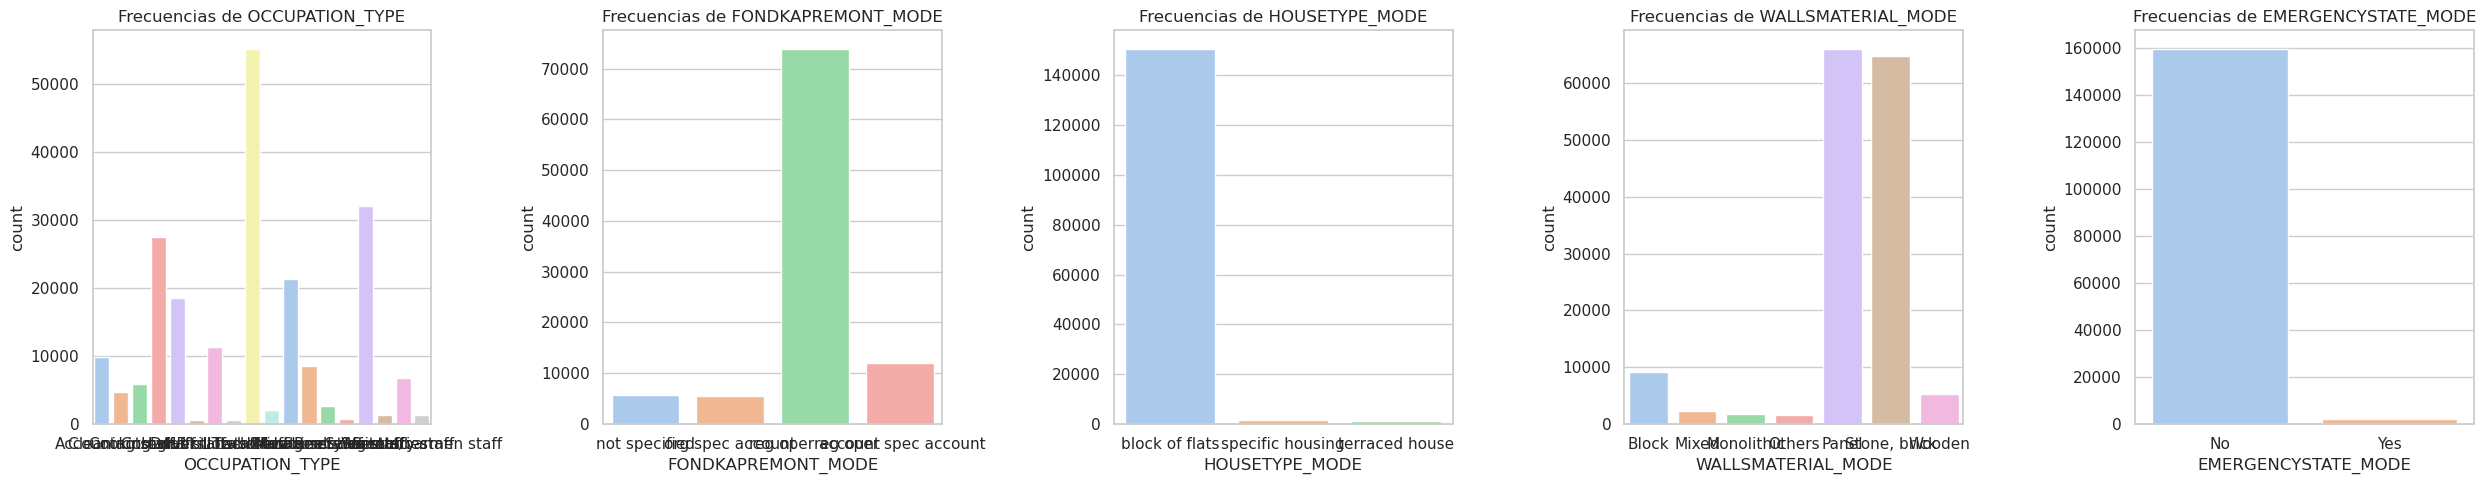

In [7]:
fig, axes = plt.subplots(1, len(var_con_faltantes), figsize=(5 * len(var_con_faltantes), 5))

# Se itera sobre las columnas y los ejes
for i, col in enumerate(var_con_faltantes):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')
    
plt.tight_layout()
plt.show()

Se decide eliminar las columnas ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], pues tienen un proporción de valores faltantes superior a 47%, lo cual es una cantidad que no se puede imputar y tampoco se pueden eliminar los registros. Por otro lado, se decide conservar la variable 'OCCUPATION_TYPE' ya que tiene menor proporción de valores faltantes, sin embargo, la razón principal, es que se considera que es una variable importante para el negocio, pues se quiere predecir si se le prestará dinero a una persona o no, seguramente el tipo de ocupación sea útil.

In [8]:
# se eliminan las variables que continen una gran cantidad de valores nulos 
elementos_a_eliminar = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
columnas_categoricas = [x for x in columnas_categoricas if x not in elementos_a_eliminar]
len(columnas_categoricas)

53

Ahora, se eliminan los registros de las variables que tienen menos de 5% de valores faltantes ya que, la cantidad de datos es suficiente para hacer el análisis y el modelo sin los registros eliminados.

In [9]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columns_to_clean = porcentaje[porcentaje < 5].index

# Se eliminan los registros de las variables que cumplen la condición anterior
data = data.dropna(subset=columns_to_clean)

Se verifican las variables con valores faltantes restantes

In [10]:
porcentaje = data[columnas_categoricas].isnull().mean() * 100
columnas_con_nulos = porcentaje[porcentaje > 0]

# Columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
OCCUPATION_TYPE               31.350468
AMT_REQ_CREDIT_BUREAU_HOUR    13.512539
AMT_REQ_CREDIT_BUREAU_DAY     13.512539
AMT_REQ_CREDIT_BUREAU_WEEK    13.512539
AMT_REQ_CREDIT_BUREAU_QRT     13.512539
dtype: float64


Dado que las  variables restantes tienen menor cantidad de valores atípicos, se incluirá a cada variable una categoría llamada "desconocido" y se añadirán los valores nulos a esta categoría

In [11]:
# Se le agrega la categoria desconocido
for columna in columnas_categoricas:
    # Se añade 'Desconocido' a las categorías si no está presente
    data[columna] = data[columna].astype('category')
    if 'Desconocido' not in data[columna].cat.categories:
    # Si no está, agregar 'Desconocido'
        data[columna] = data[columna].cat.add_categories('Desconocido')
    
    # Se rellena los valores nulos con 'Desconocido'
    data[columna] = data[columna].fillna('Desconocido')
data[columnas_categoricas] = data[columnas_categoricas].fillna('Desconocido')

In [12]:
# Se verifica que ya no hayan nulos 
porcentaje = data[columnas_categoricas].isnull().mean() * 100

# Se filtran las columas
columns_with_many_missing = porcentaje[porcentaje > 0].index.tolist()

# Mostrar las columnas 
print("Columnas con más del 0% de valores faltantes:")
print(columns_with_many_missing, len(columns_with_many_missing))

Columnas con más del 0% de valores faltantes:
[] 0


#### Detección de categorías atípicas
Al tener distintas categorías en las variables del conjunto de datos pueden llegar a tener muy pocos registros lo que no aporta suficiente información relevante para el análisis, lo que podría distorsionar los resultados si se las mantiene como categorías separadas. Agruparlas en la categoría "Otros" ayuda a reducir el ruido en los datos.

In [13]:
# Este código convierte las categorias de una variable que tengan menos del 10% de los datos en una categoria llamada otros
# Umbral 
threshold = 0.1

# Función para obtener categorías atípicas y agruparlas en "Otros"
def find_low_frequency_categories(df, threshold):
    for col in columnas_categoricas:
        frequencies = df[col].value_counts(normalize=True)  # Porcentajes
        # Se detecta categorías con baja frecuencia relativa
        low_frequency_categories = frequencies[frequencies < threshold]

        # Si hay más de 2 categorías con baja frecuencia, agruparlas en 'Otros'
        if len(low_frequency_categories) > 2:
            # Se crea una nueva columna con 'Otros' para las categorías con baja frecuencia
            df[col] = df[col].apply(lambda x: x if frequencies[x] >= threshold else 'Otros')
            print(f"\nDespués de agrupar, la columna {col} tiene las siguientes categorías:")
            print(df[col].value_counts())

find_low_frequency_categories(data, threshold)


Después de agrupar, la columna NAME_TYPE_SUITE tiene las siguientes categorías:
NAME_TYPE_SUITE
Unaccompanied    247637
Family            40058
Otros             17503
Name: count, dtype: int64

Después de agrupar, la columna NAME_INCOME_TYPE tiene las siguientes categorías:
NAME_INCOME_TYPE
Working                 157661
Commercial associate     70937
Pensioner                54995
Otros                    21605
Name: count, dtype: int64

Después de agrupar, la columna NAME_EDUCATION_TYPE tiene las siguientes categorías:
NAME_EDUCATION_TYPE
Secondary / secondary special    217067
Higher education                  73966
Otros                             14165
Name: count, dtype: int64

Después de agrupar, la columna NAME_FAMILY_STATUS tiene las siguientes categorías:
NAME_FAMILY_STATUS
Married                 195053
Otros                    65163
Single / not married     44982
Name: count, dtype: int64

Después de agrupar, la columna NAME_HOUSING_TYPE tiene las siguientes categorías:


In [14]:
# Se eliminan las categorias de Desconocidos en donde no tiene valores 
data[columnas_categoricas] = data[columnas_categoricas].apply(lambda x: x.astype('category'))
for columna in columnas_categoricas:
    # Se verificar si la categoría 'Desconocido' está presente y si tiene valores
    if 'Desconocido' in data[columna].cat.categories and data[columna].value_counts().get('Desconocido', 0) == 0:
        # Se elimina la categoría 'Desconocido' si no tiene valores
        data[columna] = data[columna].cat.remove_categories('Desconocido')

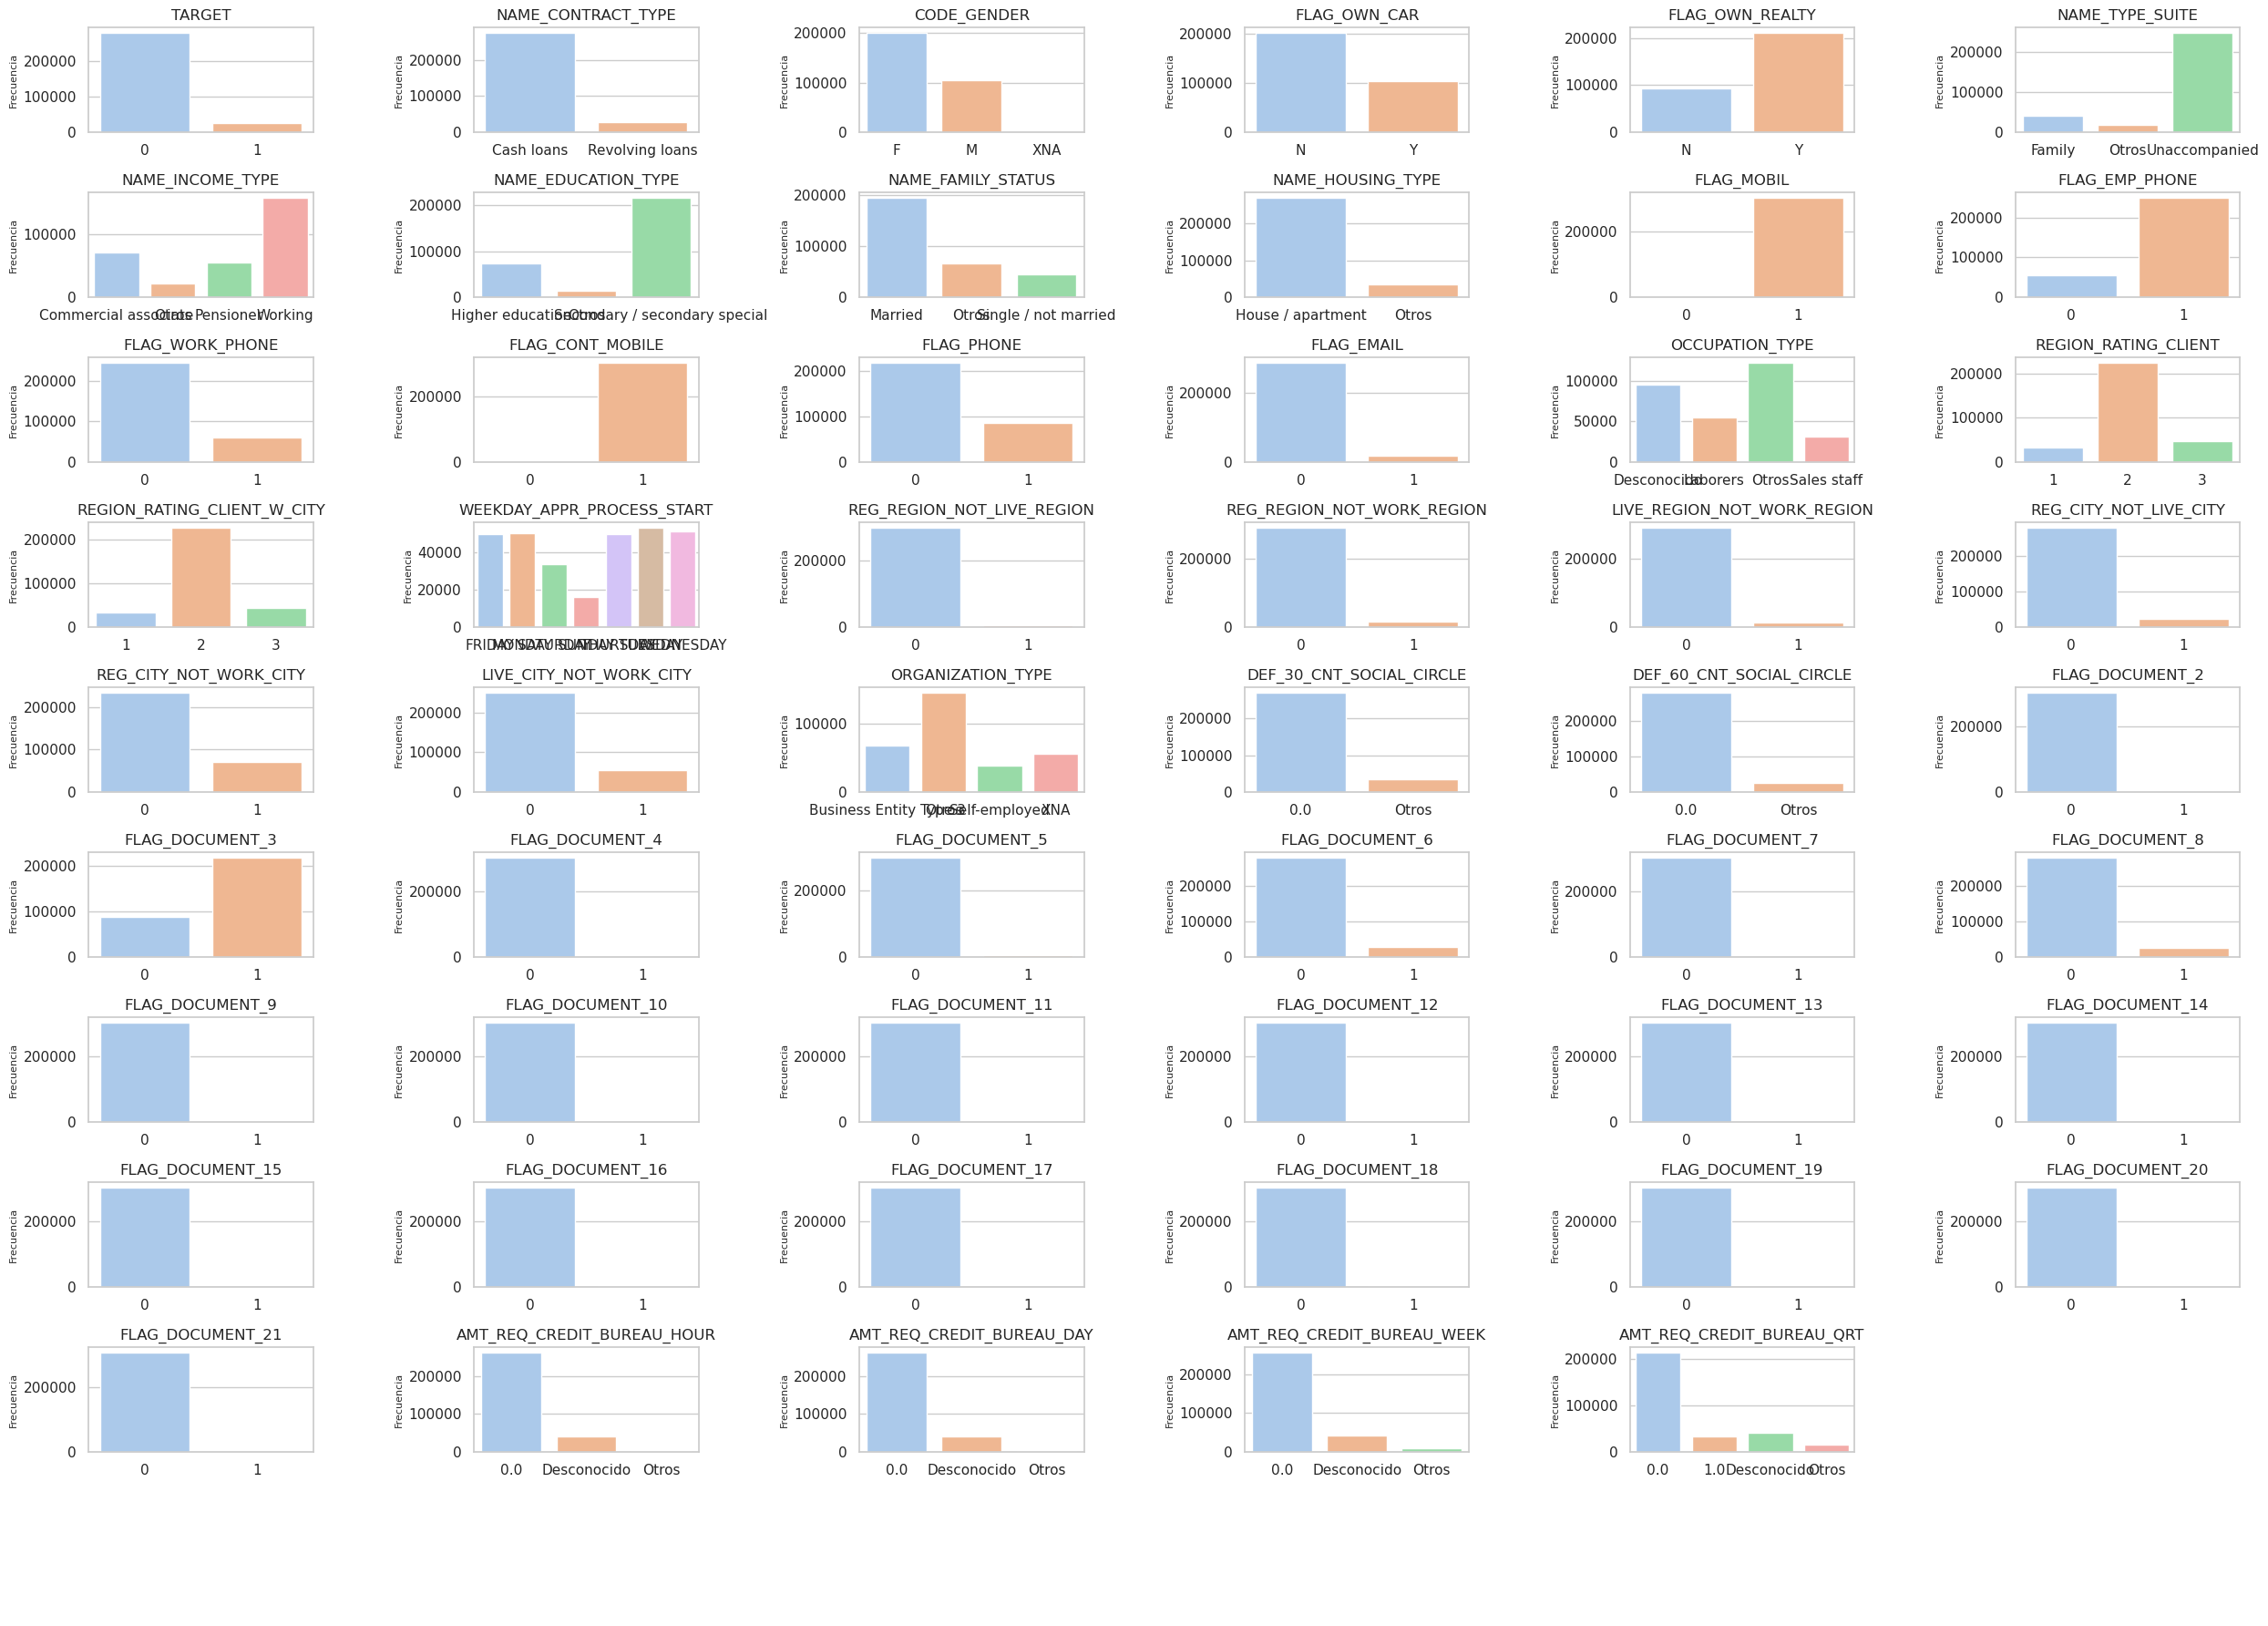

In [15]:
# Estilo general
sns.set_theme(style="whitegrid")  

# Configuración de la figura y subgráficos
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(25, 18)) 
axes = axes.flatten() 

for i, columna in enumerate(columnas_categoricas):
    if i < len(axes):  
        sns.countplot(
            data=data, 
            x=columna, 
            ax=axes[i], 
            palette="pastel" 
        )
        axes[i].set_title(columna) 
        axes[i].set_xlabel("") 
        axes[i].set_ylabel("Frecuencia", fontsize=8) 
    else:
        axes[i].axis('off')  

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas), len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()


#### Selección de variables categóricas

In [16]:
# Se obtienen las variables que tienen relación significativa con la variable objetivo 
# Nivel de significancia
alpha = 0.05
relacion_sig =[]
# Se itera sobre las columnas categóricas
for col in columnas_categoricas:
    # tabla de contingencia
    contingency_table = pd.crosstab(data[col], data['TARGET'])
    
    # rueba de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Se verifica si el valor p es menor que el nivel de significancia
    if p <= alpha:
        relacion_sig.append(col)
        #print(f"Variable '{col}' tiene una relación significativa con 'TARGET' (p-value = {p})")

In [17]:
# Se disminuye la cantidad de variables categóricas candidatas
len(relacion_sig)

41

Se conservan las variables que tienen una relación significativa con la variable objetivo y posteriormente se eligen las variables categóricas que aportan más infomación al modelo a partir de la entropía.

In [18]:
# Función para calcular la entropía de una variable categórica
def calcular_entropia(columna):
    frecuencias = columna.value_counts(normalize=True)
    entropia = -np.sum(frecuencias * np.log2(frecuencias))
    return entropia

# Se calcula la entropía para cada columna categórica
entropias = {col: calcular_entropia(data[col]) for col in relacion_sig}
entropias_ordenadas = sorted(entropias.items(), key=lambda x: x[1], reverse=True)

top_10_variables = entropias_ordenadas[:10]
top_10_variables_nombre = list(map(lambda t: t[0], top_10_variables))

print("Top 10 variables categóricas con mayor entropía:")
for col, entropia in top_10_variables:
    print(f"{col}: {entropia}")

Top 10 variables categóricas con mayor entropía:
WEEKDAY_APPR_PROCESS_START: 2.7322464507199626
OCCUPATION_TYPE: 1.838477876387785
ORGANIZATION_TYPE: 1.8122935381890617
NAME_INCOME_TYPE: 1.6975084189223022
AMT_REQ_CREDIT_BUREAU_QRT: 1.3297126879334993
NAME_FAMILY_STATUS: 1.2955329906945625
REGION_RATING_CLIENT: 1.0832762996155216
REGION_RATING_CLIENT_W_CITY: 1.0676247894676059
NAME_EDUCATION_TYPE: 1.0507912974246525
CODE_GENDER: 0.9264111102795108


Se eligen estas variables porque suelen contener más información útil y relevante para discriminar entre las clases objetivo, adicionalmente, se está frente a un conjunto de datos donde la mayoría de las variables tienen una clase dominante, al usar esta metodología aparte de que se está obteniendo información útil para el modelo, también se está diminuyendo el sesgo.

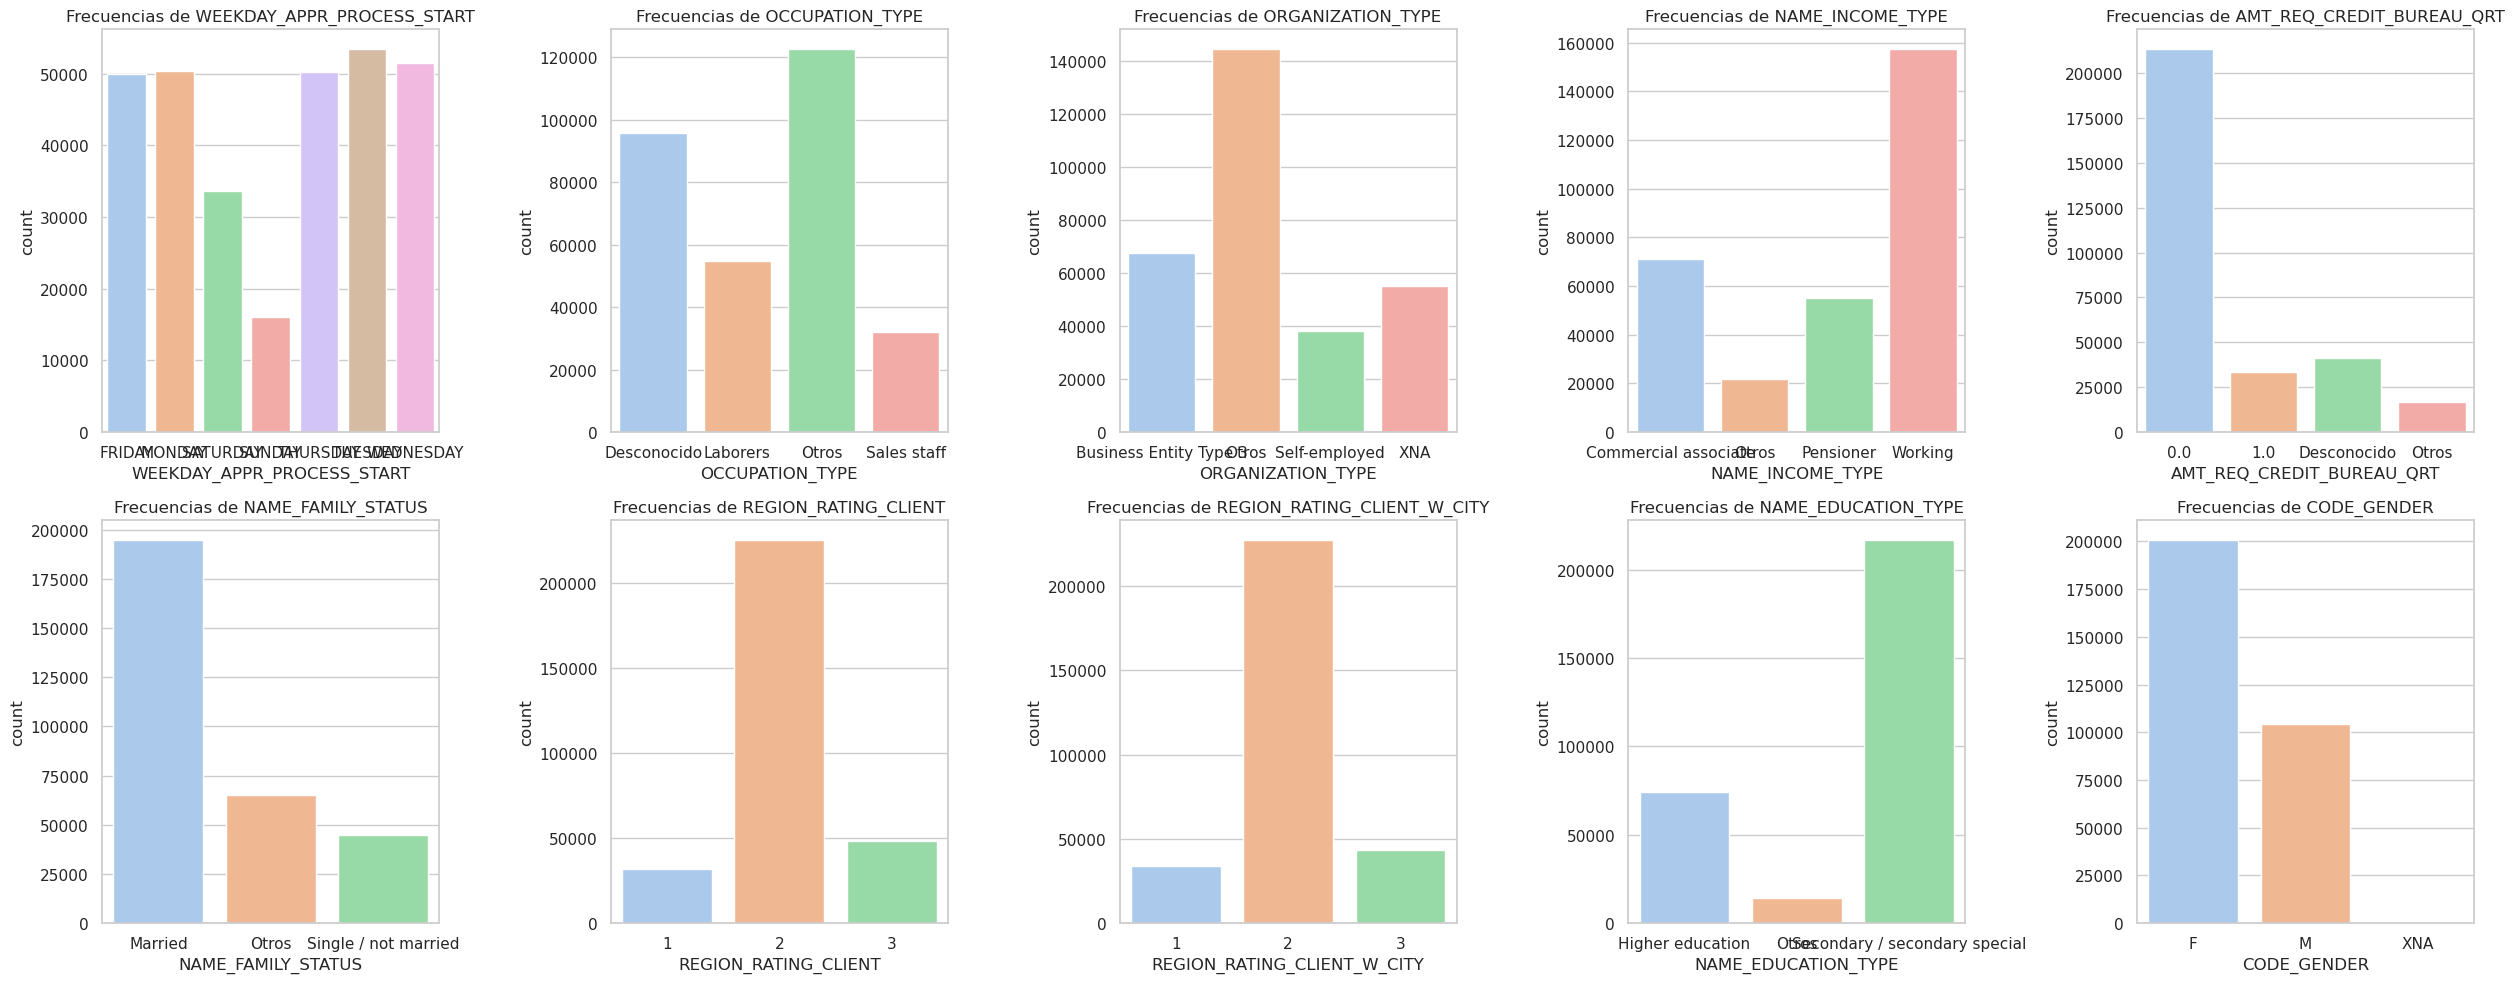

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(5 * 5, 5 * 2))

axes = axes.flatten()

for i, col in enumerate(top_10_variables_nombre):
    sns.countplot(x=col, data=data, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Análisis Numérico

#### Tratamiento de valores faltantes

En este caso identificamos varios casos de porcentajes de valores faltantes en el conjunto de datos, considerando que hay un total de `307.511` registros, tomamos una acción diferente para cada caso.

In [20]:
# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = data[numeric_cols].isnull().sum() / data[numeric_cols].shape[0] * 100
missing_percentage

SK_ID_CURR                       0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003932
AMT_GOODS_PRICE                  0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.986671
CNT_FAM_MEMBERS                  0.000000
HOUR_APPR_PROCESS_START          0.000000
EXT_SOURCE_1                    56.389950
EXT_SOURCE_2                     0.214615
EXT_SOURCE_3                    19.816316
APARTMENTS_AVG                  50.800464
BASEMENTAREA_AVG                58.566570
YEARS_BEGINEXPLUATATION_AVG     48.833872
YEARS_BUILD_AVG                 66.538116
COMMONAREA_AVG                  69.908387
ELEVATORS_AVG                   53.353888
ENTRANCES_AVG                   50

Así mismo tenemos en cuenta que de las 65 variables numéricas, el **25%** de las variables poseen a lo sumo un **0.21%** de valores faltantes, por el contrario, existe la alta proporción de variables con porcentajes de valores faltantes superiores al **50%**.

In [21]:
missing_percentage.describe()

count    65.000000
mean     41.144543
std      27.095105
min       0.000000
25%       0.214615
50%      50.402362
75%      59.422735
max      69.908387
dtype: float64

##### Caso 1:

Para la eliminación de valores faltantes consideramos un umbral de **20%**, del cual para el `caso 1` identificamos que existe un total de 45 variables que superan este umbral, por lo cual consideramos eliminar estas variables debido a que un método de imputación no resultaría tan eficiente debido a la escasa información que se presentan en ellas.

In [22]:
# Filtrar las columnas con más del 10% de valores faltantes
columns_with_high_missing = missing_percentage[missing_percentage > 20]

# Nombre de las columnas a eliminar
del_cols = columns_with_high_missing.index

print(f'''Hay un total de {len(columns_with_high_missing)} variables con porcentaje de valores faltantes mayor a 20%''')

Hay un total de 45 variables con porcentaje de valores faltantes mayor a 20%


Por lo cual nuestras variables numéricas que mantendremos serán las listadas a continuación, siendo éstas un total de 19 variables.

In [23]:
# Actualizar la lista numeric_cols eliminando las columnas eliminadas
numeric_cols = [col for col in numeric_cols if col not in del_cols]
numeric_cols.remove('SK_ID_CURR') # Esta es el ID único
numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
data[numeric_cols].shape

(305198, 19)

##### Caso 2:

Del mismo modo evidenciamos que hay variables que poseen menos del **1%** de valores faltantes, y otras con más del **1%**. En este caso trataremos con las variables que tienen menos del **1%** y el proceder decidido fue eliminar los registros que tienen valores nulos, debido a que consideramos que el conjunto de datos es extenso y los pocos registros eliminados no deberían tener un impacto significativo sobre la distribución de los datos.

In [25]:
# Filtrar las columnas con un porcentaje de valores faltantes entre 0% y 1%
columns_with_low_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage <= 1)]

# Lista de columnas a evaluar
cols_to_check = columns_with_low_missing.index

# Eliminar registros que tienen valores faltantes en las columnas seleccionadas
rows_to_drop = data[cols_to_check].isnull().any(axis=1)
data = data[~rows_to_drop]

print(f'''Se eliminaron {rows_to_drop.sum()} registros con valores faltantes 
en las columnas con menos del 1% de valores faltantes.''')

Se eliminaron 667 registros con valores faltantes 
en las columnas con menos del 1% de valores faltantes.


##### Caso 3:

Para este caso consideramos las variables que poseen menos del **20%** de valores faltantes y procedemos a aplicar imputación con la mediana sobre estos valores faltantes.

**Nota:** En principio la intención era imputar con la KNN, pero el computo no dio y se morian o no finalizaban los procesos. KNN era para cuasi conservar la distribución de los datos, a diferencia de imputación con la mediana que no conserva la distribución en los mismos.

In [27]:
data[numeric_cols].isnull().sum()/data[numeric_cols].shape[0]*100

CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
CNT_FAM_MEMBERS                0.000000
HOUR_APPR_PROCESS_START        0.000000
EXT_SOURCE_2                   0.000000
EXT_SOURCE_3                  19.784849
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
AMT_REQ_CREDIT_BUREAU_MON     13.498790
AMT_REQ_CREDIT_BUREAU_YEAR    13.498790
dtype: float64

Realizando la imputación con la mediana.

In [28]:
# Crear una instancia del imputador de la mediana
median_imputer = SimpleImputer(strategy='median')

# Aplicar la imputación directamente sobre las columnas numéricas en el DataFrame original
data[numeric_cols] = median_imputer.fit_transform(data[numeric_cols])

# Verificar los primeros registros después de la imputación
data[numeric_cols].head(4)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1.0,10.0,0.262949,0.139376,2.0,2.0,-1134.0,0.0,1.0
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,2.0,11.0,0.622246,0.535276,1.0,1.0,-828.0,0.0,0.0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,9.0,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,2.0,17.0,0.650442,0.535276,2.0,2.0,-617.0,0.0,1.0


Verificando que no hayan datos nulos.

In [29]:
data[numeric_cols].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

#### Conversión de categoría

Convertir una variable a un tipo de dato `int64` no es posible cuando hay valores faltantes, hecho este paso convertivos dos variables a este tipo de dato para facilitar su entendimiento.

In [32]:
# Convertir las columnas al tipo int64
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']] = data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].astype('int64')

# Verificar el cambio de tipo
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].dtypes

CNT_CHILDREN       int64
CNT_FAM_MEMBERS    int64
dtype: object

#### Pruebas de normalidad

Realizamos la prueba de normalidad de Shapiro Wilk, para ello importamos la librería a utilizar.

Pese a que en la fase de visualización de las distribuciones de cada variable pudimos evidenciar la no-normalidad de las mismas, decidimos realizar la prueba de normalidad por protocolo. También reconocemos que la esta prueba de normalidad suele ser útil en conjunto de datos pequeños, y por lo cual podría no ser eficaz en este caso, decidimos implementarla más que todo por lo que ya sabiamos *(por las visualizaciones)* que no son normales.

In [31]:
# Crear una lista para almacenar los resultados
results = []

# Iterar sobre cada columna numérica
for col in numeric_cols:
    # Realizar la prueba de normalidad Shapiro-Wilk
    _, p_value = shapiro(data[col])
    
    # Determinar si es normal o no
    normality = "Normal" if p_value >= 0.05 else "-"
    
    # Agregar el resultado a la lista
    results.append({'Variable': col, 'Normalidad': normality})

# Convertir la lista de resultados a un DataFrame
normality_results = pd.DataFrame(results)

normality_results.head(4)

,Variable,Normalidad
0,CNT_CHILDREN,-
1,AMT_INCOME_TOTAL,-
2,AMT_CREDIT,-
3,AMT_ANNUITY,-


Cómo podemos ver ninguna variable es reconocida como normal, bajo la prueba de Skapiro Wilk, la celda de abajo muestra las variables que mediante el P-Valor de Shapiro Wilk, deberían ser normales.

In [32]:
normality_results[normality_results["Normalidad"] != '-']

,Variable,Normalidad


#### Visualización de distribuciones

Ahora empezaremos a visualizar las distribuciones de las variables numéricas para poder realizar un análisis descriptivo sobre las mismas.

##### Sobre cliente

En primera instancia vamos a considerar la información que corresponde al cliente, decriptores como cuántos hijos tiene, cuánto gana, etc. Variables que describen al cliente.

En el caso de la información del score *(asumimos que crediticio)* proveniente de tres (3) centrales de riesgo diferentes, aunque la central número uno (1) fue eliminada debido a la alta presencia de valores faltantes, de ello podemos obsevar lo siguiente:

* La segunda y tercera central reporta una mayor concentración de clientes con un score entre el **50%** y **80%**, lo cual nos indica un buen perfil crediticio del cliente.

* El **50%** por ciento de lo clientes cuenta con un salario *(no se especifíca si anual; suponemos que si)* entre **\$112.500** **\$202.500**, aunque se evidencia la presencia de clientes que cuentan con un sueldo superior a este rango, quizá tenga relación con los clientes que tienen puestos laborales de mayor paga.

**Nota:** Toca tener en cuenta que este score, según el diccionario de datos está normalizado, por lo cual la inferencia que se realizó sobre estas variables podría estar sujeta a sesgos.

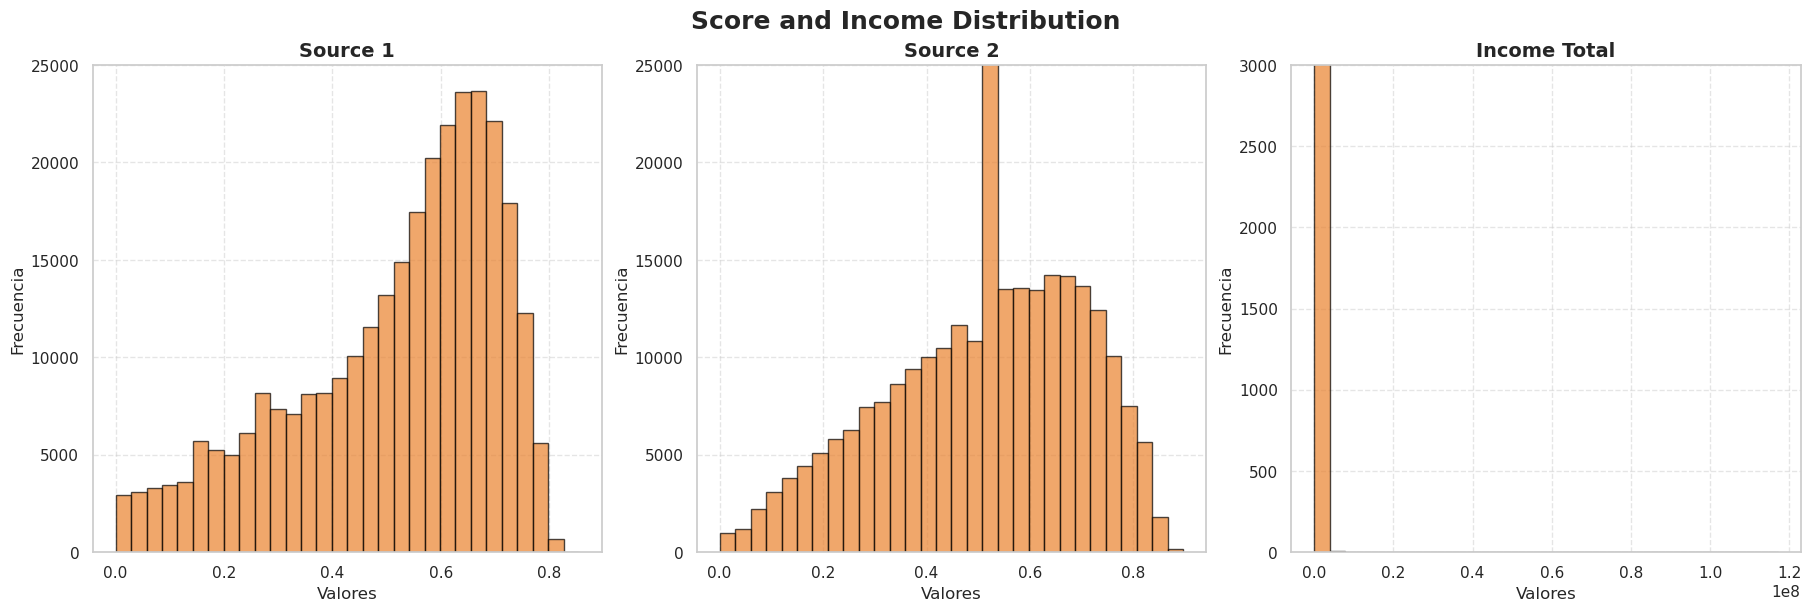

In [33]:
# Lista de variables a graficar
variables = ["EXT_SOURCE_2", "EXT_SOURCE_3", "AMT_INCOME_TOTAL"]

# Crear figura y ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Score and Income Distribution', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 4)):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Source {i}" if i <= 2 else "Income Total", fontsize=14, fontweight="bold")  # Título personalizado
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.set_ylim(0, 25000) if i <= 2 else ax.set_ylim(0, 3000)  # Establecer límites en el eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [34]:
data[variables].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL
count,3.015890e+05,301589.000000,3.015890e+05
mean,5.142202e-01,0.515659,1.686440e+05
std,1.911399e-01,0.174764,2.387073e+05
min,8.173617e-08,0.000527,2.565000e+04
25%,3.921029e-01,0.417100,1.125000e+05
50%,5.658218e-01,0.535276,1.476000e+05
75%,6.635585e-01,0.636376,2.025000e+05
max,8.549997e-01,0.896010,1.170000e+08


* Considerando la información proporcionada por el diccionario de datos, es posible afirmar que el **50%** de los clientes habita en una región con indice de población.

* De igual forma se evidencia que la mitad de los clientes no cambian de celular por al menos **2 años** al momento de solicitar el préstamo a la entidad bancaria.

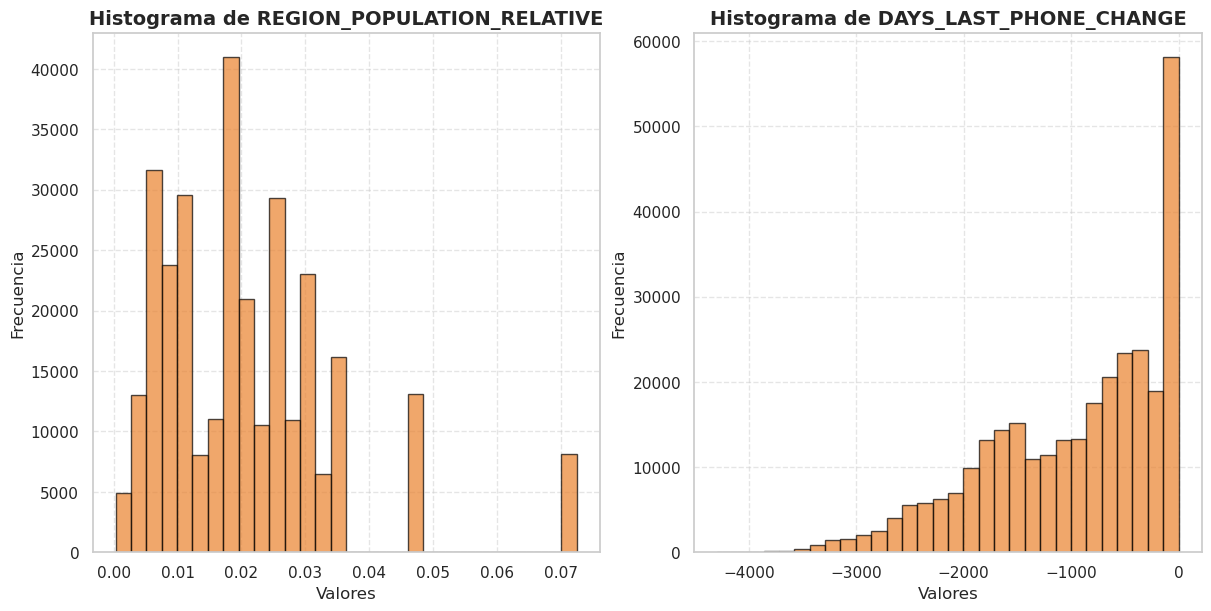

In [35]:
# Variables: REGION_POPULATION_RELATIVE y DAYS_LAST_PHONE_CHANGE
variables = ["REGION_POPULATION_RELATIVE", "DAYS_LAST_PHONE_CHANGE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [36]:
data[variables].describe()

,REGION_POPULATION_RELATIVE,DAYS_LAST_PHONE_CHANGE
count,301589.000000,301589.000000
mean,0.020841,-965.341551
std,0.013805,826.949005
min,0.000290,-4292.000000
25%,0.010006,-1572.000000
50%,0.018850,-761.000000
75%,0.028663,-276.000000
max,0.072508,0.000000


* Podemos evidenciar que la mayor cantidad de clientes, al momento de solicitar el crédito, no cuentan con hijo alguno, de igual forma podemos evidenciar que en caso de tener algún hijo, la mayoría de clientes suelen tener a lo sumo **1 solo hijo**.

* El **50%** de los clientes tienen entre **2** y **3** familiares, aunque se presencian casos atípicos donde se registran clientes con 20 familiares.

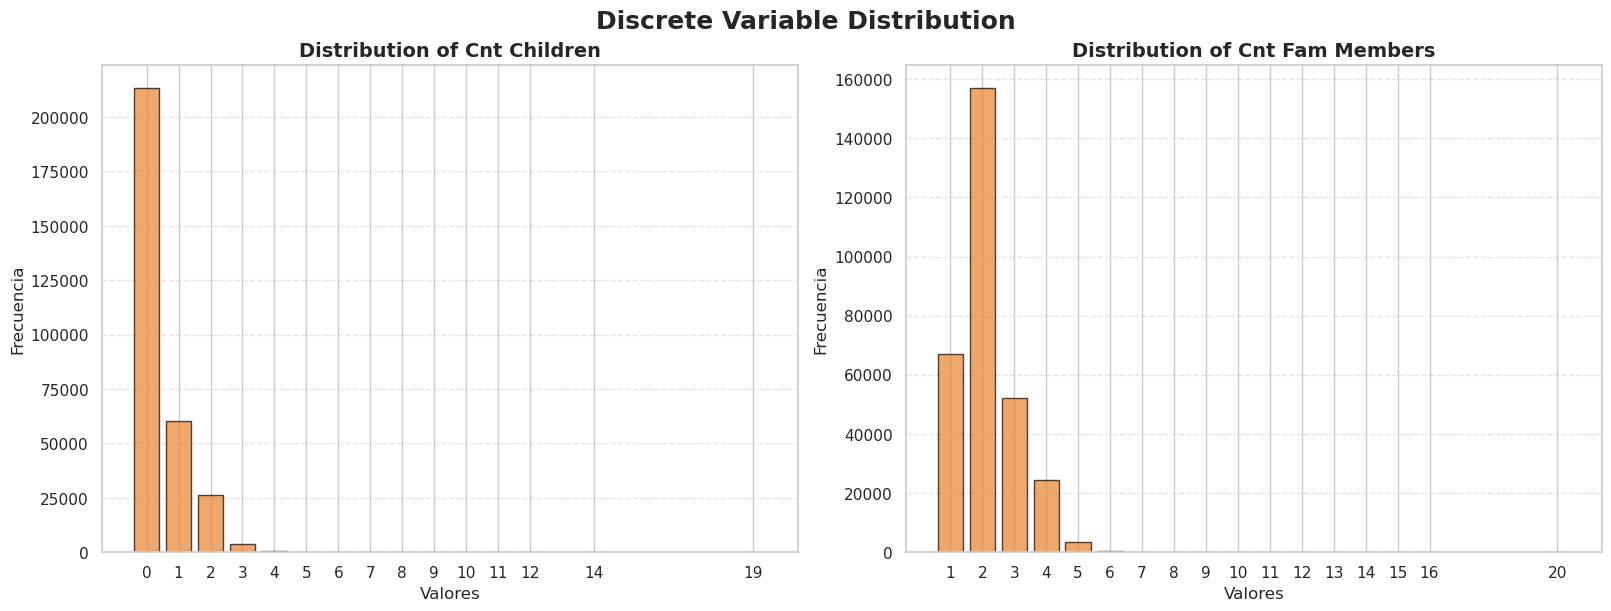

In [35]:
# Lista de variables a graficar
variables = ["CNT_CHILDREN", "CNT_FAM_MEMBERS"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# Ajustar el suptítulo
fig.suptitle('Discrete Variable Distribution', fontsize=18, fontweight='bold')

# Iterar sobre cada variable y su respectivo eje
for ax, var, i in zip(axes, variables, range(1, 3)):
    # Contar frecuencias de valores únicos
    value_counts = data[var].value_counts().sort_index()
    
    # Crear gráfico de barras
    ax.bar(value_counts.index, value_counts.values, color="#EA822D", edgecolor="black", alpha=0.7)
    ax.set_title(f"Distribution of {var.replace('_', ' ').title()}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Valores", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    
    # Ajustar los valores del eje X como enteros
    ax.set_xticks(value_counts.index)
    ax.set_xticklabels(value_counts.index.astype(int))
    
    ax.grid(axis='y', linestyle="--", alpha=0.5)

# Mostrar la figura
plt.show()

In [34]:
data[variables].describe()

,CNT_CHILDREN,CNT_FAM_MEMBERS
count,304531.000000,304531.000000
mean,0.417140,2.153163
std,0.722308,0.910638
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,2.000000
75%,1.000000,3.000000
max,19.000000,20.000000


#### Información sobre la solicitud de crédito

En éste apartado se destaca información relacionada con la información del cliente al momento de la solicitud del crédito.

En primera instancia es posible evidenciar que las variables de fechas tienen un formato inusual, por lo cual la explicación que se puede realizar con la variable `DAYS_BIRTH` es la siguiente:

**Paso 1:** Se toma un valor correspondiente a la distribución de la variable, por ejemplo **-20.000**.
**Paso 2:** El valor anterior se divide por **365**, teniendo en cuenta estamos hablando términos de la edad del cliente.
**Paso 3:** Al valor anterior se le toma el valor absoluto, en este caso da un aproximado a 54 años de edad, este valor relaciona la edad del cliente al momento de solicitar el crédito.

Por tal motivo, en la variable `DAYS_BIRTH`, menores valores indican clientes de mayor edad que solicitarion un crédito. Las demás variables no hallo relación de como realizar la transformación de los datos, pero la analogía es la misma, a menor número en la variable `DAYS_REGISTRATION` indica que el cliente cambio con mayor tiempo de antelación el registro, finalmente un menor número de `DAYS_ID_PUBLISH` indica que el cliente actualizó su identificación personal mucho tiempo antes de la solicitud del crédito.

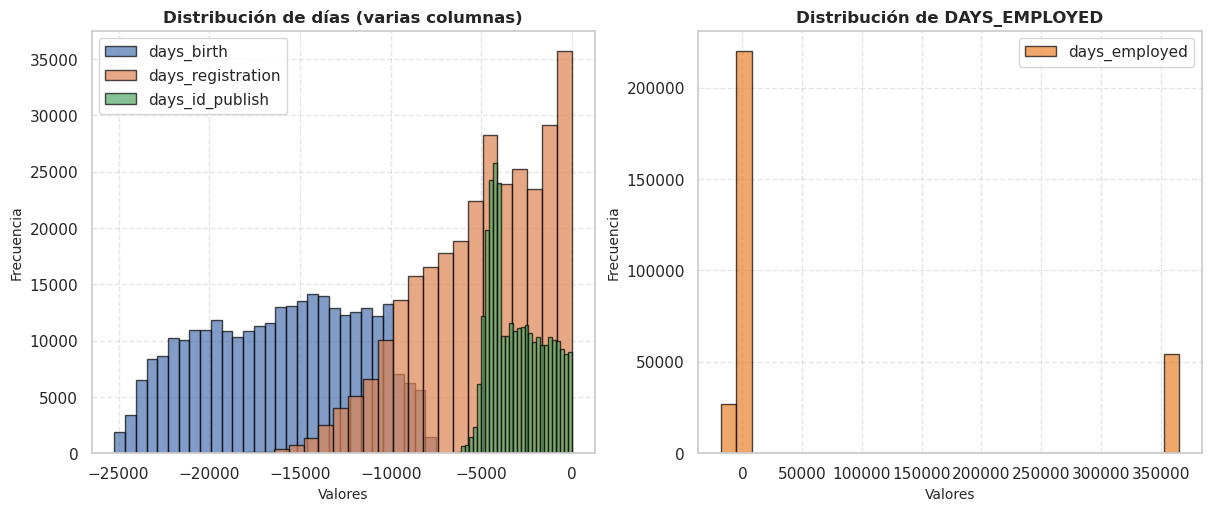

In [39]:
# Crear figura y dos axes en una fila, dos columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico de la izquierda: Múltiples variables
days_var = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for var in days_var:
    axes[0].hist(data[var], bins=30, alpha=0.7, edgecolor="black", label=var.lower())
axes[0].set_title("Distribución de días (varias columnas)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Valores", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].grid(True, linestyle="--", alpha=0.5)
axes[0].legend()

# Gráfico de la derecha: Variable específica
axes[1].hist(data['DAYS_EMPLOYED'], bins=30, color="#EA822D", alpha=0.7, edgecolor="black", label='days_employed')
axes[1].set_title("Distribución de DAYS_EMPLOYED", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Valores", fontsize=10)
axes[1].set_ylabel("Frecuencia", fontsize=10)
axes[1].grid(True, linestyle="--", alpha=0.5)
axes[1].legend()

# Mostrar la figura
plt.show()

In [40]:
data[days_var + ['DAYS_EMPLOYED']].describe()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_EMPLOYED
count,301589.000000,301589.000000,301589.000000,301589.000000
mean,-16039.233298,-4987.251723,-2994.893948,63823.927597
std,4362.568488,3521.711243,1509.146801,141284.916728
min,-25229.000000,-24672.000000,-6551.000000,-17912.000000
25%,-19682.000000,-7480.000000,-4299.000000,-2762.000000
50%,-15754.000000,-4506.000000,-3255.000000,-1215.000000
75%,-12416.000000,-2013.000000,-1721.000000,-290.000000
max,-7489.000000,0.000000,0.000000,365243.000000


* Para la variable `AMT_CREDIT` es posible evidenciar que el **50%** de los montos aprovados tuvieron un valor menor o igual a **\$513.531** unidades monetarias, de igual forma se evidencian créditos aprovados con un monto equivalente a **\$4.050.000** unidades monetarias.

* En el caso de `AMT_ANNUITY`, es posible evidenciar que el monto aprovado en solicitudes previos alcanzó a ser a lo sumo **\$34.596** unidades monetarias para el **50%** de los clientes.

* Finalmente, `AMT_GOODS_PRICE` indica que para el **50%** de los clientes el precio del bien que se solicitó no fue mayor a **\$450.000** unidades monetarias, manteniendo un segmento de clientes que piden montos superiores a este valor e incluso hasta **\$4.050.000** unidades monetarias.

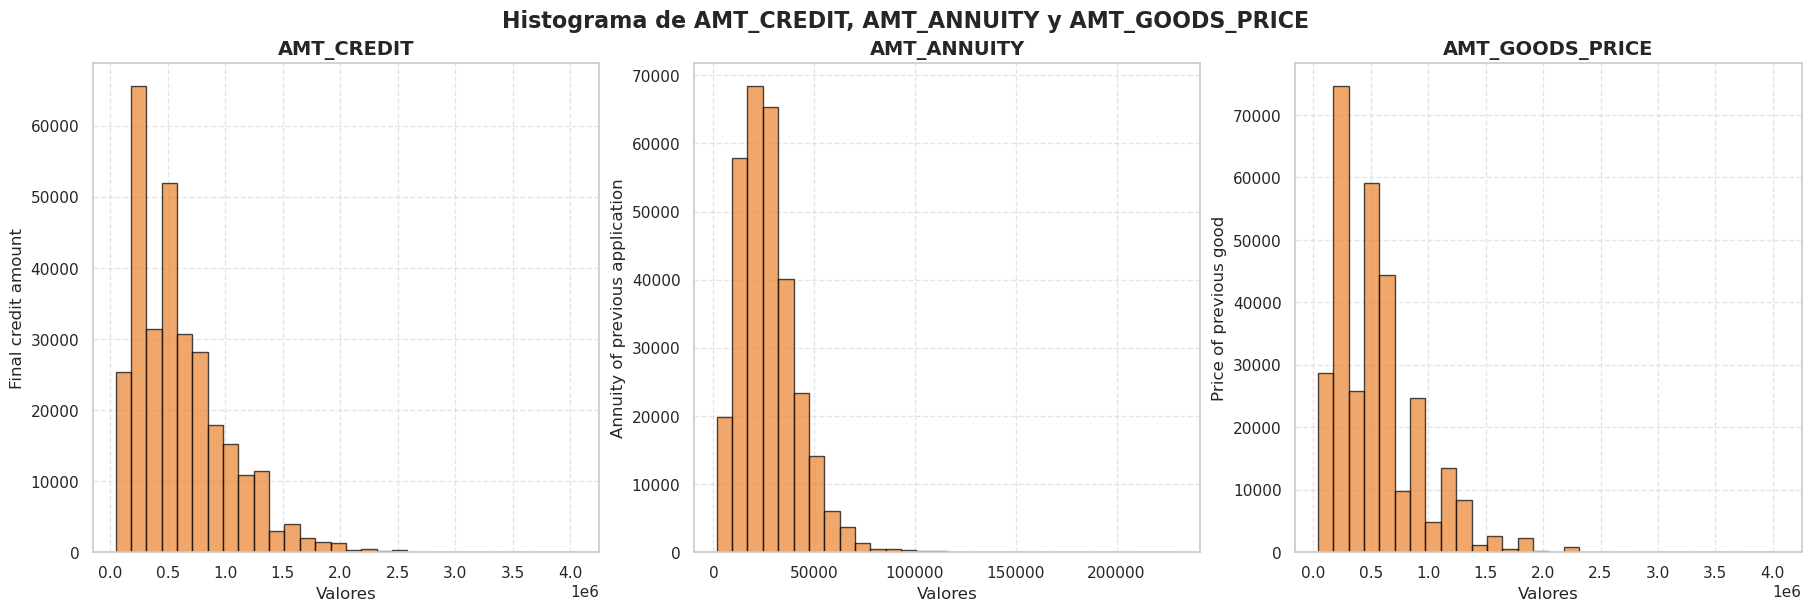

In [41]:
amt_variables = [
    "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"
]

# Crear la figura y los ejes (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Lista de etiquetas personalizadas para cada gráfico
y_labels = [
    "Final credit amount",  # Para AMT_CREDIT
    "Annuity of previous application",  # Para AMT_ANNUITY
    "Price of previous good"  # Para AMT_GOODS_PRICE
]

# Iterar sobre cada variable, su respectivo eje y la etiqueta personalizada
for ax, var, y_label in zip(axes, amt_variables, y_labels):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"{var}", fontsize=14, fontweight="bold")  # Título con el nombre de la variable
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel(y_label, fontsize=12)  # Etiqueta eje Y personalizada
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Título general para el grupo de variables
fig.suptitle("Histograma de AMT_CREDIT, AMT_ANNUITY y AMT_GOODS_PRICE", fontsize=16, fontweight="bold")

# Mostrar la figura
plt.show()

In [42]:
data[amt_variables].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.015890e+05,301589.000000,3.015890e+05
mean,5.995160e+05,27144.695556,5.384398e+05
std,4.020695e+05,14474.562601,3.689826e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16573.500000,2.385000e+05
50%,5.175000e+05,24939.000000,4.500000e+05
75%,8.086500e+05,34636.500000,6.795000e+05
max,4.050000e+06,230161.500000,4.050000e+06


El diccionario de datos no es claro con la información que representan los datos en estas variables, por lo cual no puedo decir mucho sobre estas.

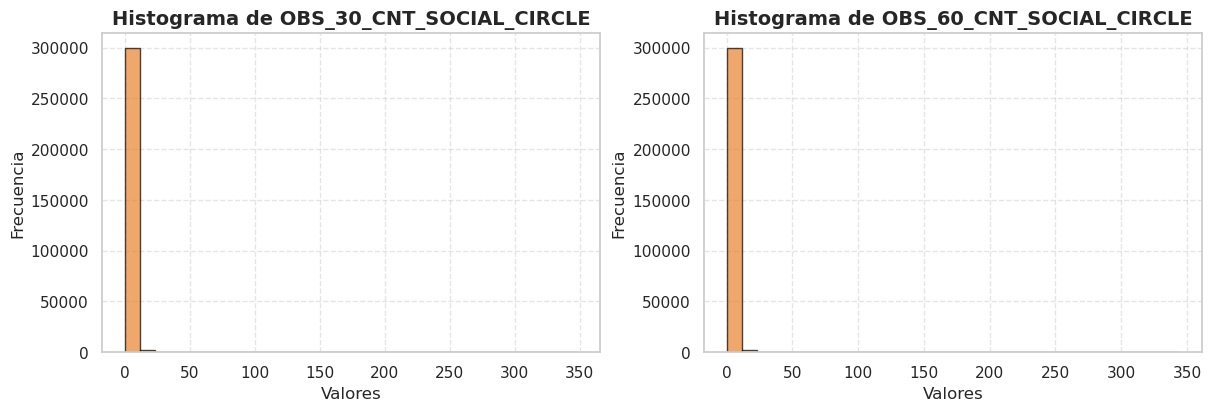

In [43]:
# Lista de variables
social_circle_variables = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, social_circle_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [44]:
data[social_circle_variables].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
count,301589.000000,301589.00000
mean,1.422174,1.40525
std,2.402709,2.38157
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,2.000000,2.00000
max,348.000000,344.00000


Las variables `AMT_REQ_CREDIT_BUREAU_MON` y `AMT_REQ_CREDIT_BUREAU_YEAR` no representan relevancia estádistica, la información en los quartiles no genera información que pueda ser usada para implementar variabilidad en el modelado.

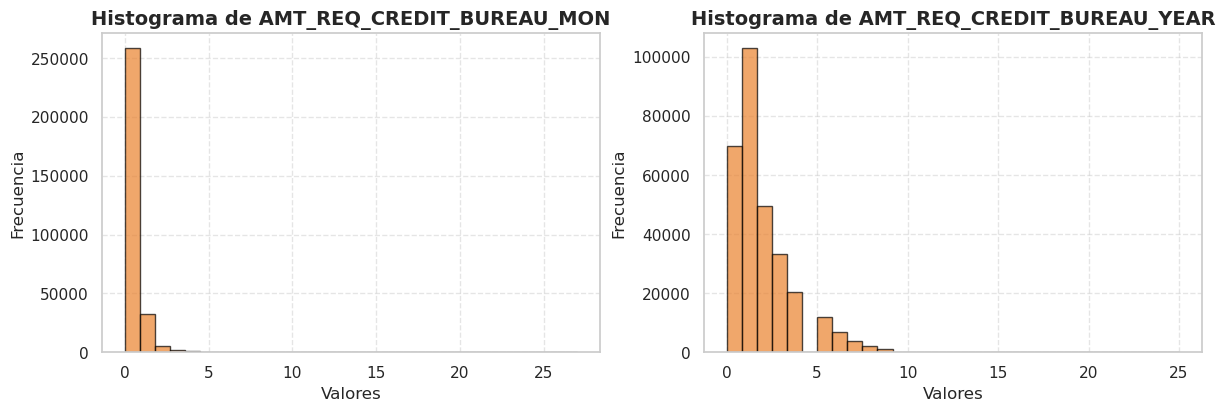

In [45]:
# Lista de variables
credit_bureau_variables = ["AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_YEAR"]

# Crear figura y ejes (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Iterar sobre cada variable y su respectivo eje
for ax, var in zip(axes, credit_bureau_variables):
    ax.hist(data[var], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
    ax.set_title(f"Histograma de {var}", fontsize=14, fontweight="bold")  # Título del gráfico
    ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
    ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
    ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()


In [46]:
data[credit_bureau_variables].describe()

,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,301589.000000,301589.000000
mean,0.231882,1.784024
std,0.857530,1.766391
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,27.000000,25.000000


Finalmente, la mitad de las solicitudes de crédito suelen tener una concentración entre las **10 am** y las **2 pm**, el comportamiento de la distribución refleja similaridad a un comportamiento normal por parte de los clientes. Algo a destacar es la presencia de solicitudes de crédito en horas como las **11 pm** o durante la **media noche**.

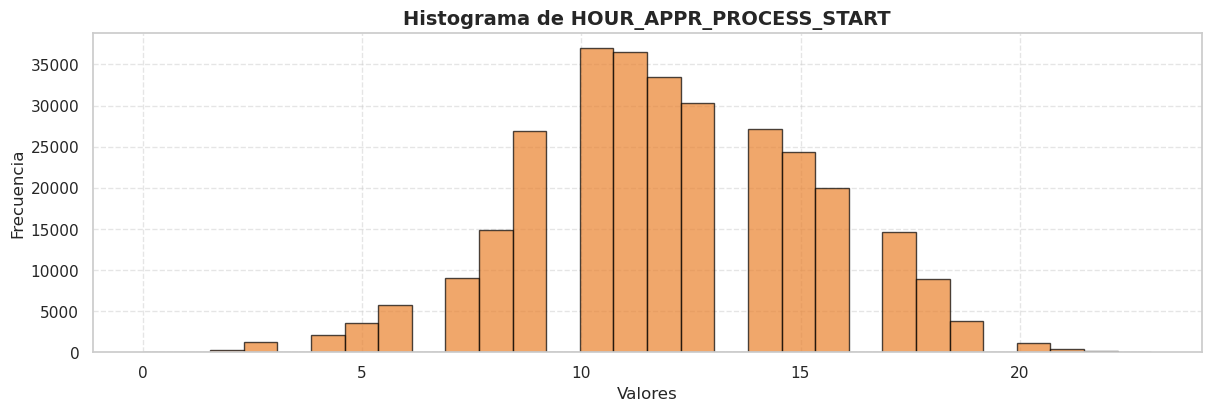

In [47]:
# Variables a graficar
variables = [
    "HOUR_APPR_PROCESS_START"
]

# Crear figura y ejes (1 fila, 1 columna)
fig, ax = plt.subplots(1, 1, figsize=(12, 4), constrained_layout=True)

# Como solo hay una variable, trabajamos directamente con 'ax' en lugar de iterar
ax.hist(data[variables[0]], bins=30, alpha=0.7, edgecolor="black", color="#EA822D")
ax.set_title(f"Histograma de {variables[0]}", fontsize=14, fontweight="bold")  # Título del gráfico
ax.set_xlabel("Valores", fontsize=12)  # Etiqueta eje X
ax.set_ylabel("Frecuencia", fontsize=12)  # Etiqueta eje Y
ax.grid(True, linestyle="--", alpha=0.5)  # Agregar cuadrícula

# Mostrar la figura
plt.show()

In [48]:
data[variables].describe()

,HOUR_APPR_PROCESS_START
count,301589.000000
mean,12.060447
std,3.265992
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,23.000000


#### Selección de variables numéricas

Se eligen variables que se presume resultan ser más significativas al momento de entrenar un modelo de Machine Learning, teniendo en cuenta principalmente dos (2) diferentes aspectos, consideramos variables que creemos pueden tener una mayor **representabilidad en el negocio** y variables donde su distribución permite inferir que su **variabilidad** puede resultar útil para la correcta identificación del riesgo créditicio.

Las variables sugeridas se listan a continuación:

* REGION_POPULATION_RELATIVE
* EXT_SOURCE_2
* HOUR_APPR_PROCESS_START
* AMT_GOODS_PRICE
* AMT_CREDIT
* DAYS_BIRTH
* AMT_ANNUITY
* CNT_FAM_MEMBERS

## Análisis Bivariado

### Numérico - Numérico

### Categórico - Categórico

### Numérico - Categórico

# Modelado

## Selección y justificación de los modelos

## Selección y justificación de métricas

## Implementación del <modelo 1>

## Implementación del <modelo 2>

## Comparación de modelos

# Conclusiones